### 1- Business Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In this project we need to collect data about the CO2 emission, engine size, and Fuel consumption.


### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-22 06:14:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-07-22 06:14:41 (1.81 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv('/content/FuelConsumption.csv')

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(1067, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


### 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [ ]:
#data is cleaned
#since this is a regression model, we only focus on numerical values

#METHOD 1
df_numeric = df.select_dtypes(include = ['number'])
df_numeric.corr()

#METHOD 2
#ndf = df[['MODELYEAR',ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',''FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
#ndf.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

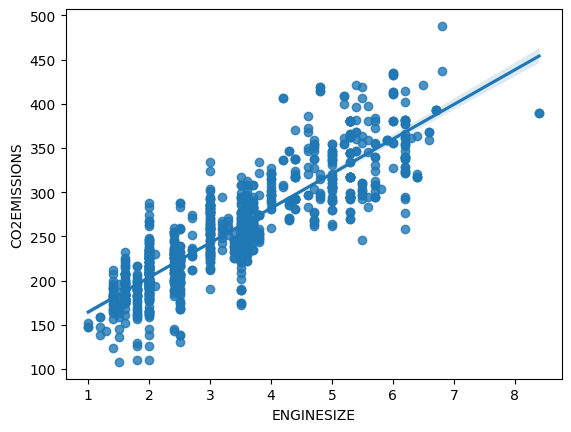

In [ ]:
from matplotlib import pyplot as plt

import seaborn as sns

sns.regplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = df)

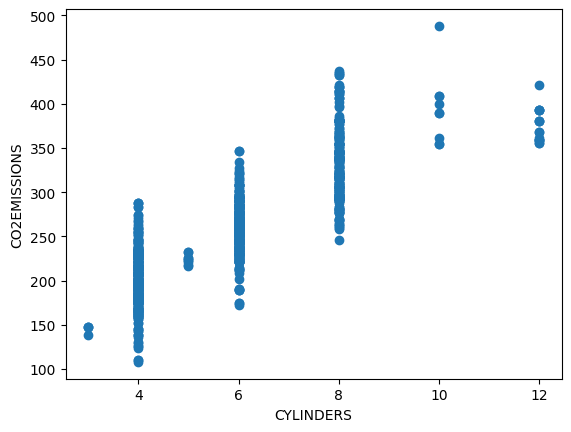

In [ ]:
plt.scatter(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()


<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

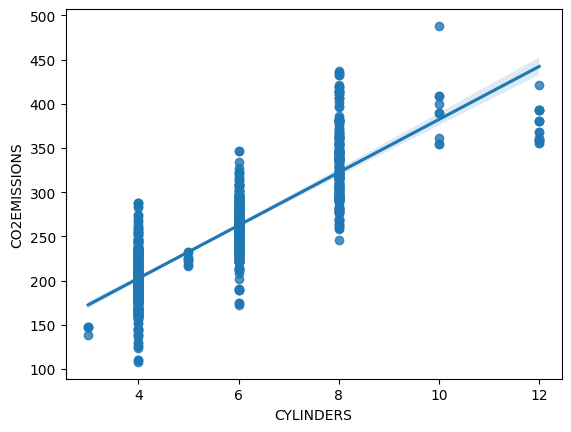

In [ ]:

sns.regplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = df)

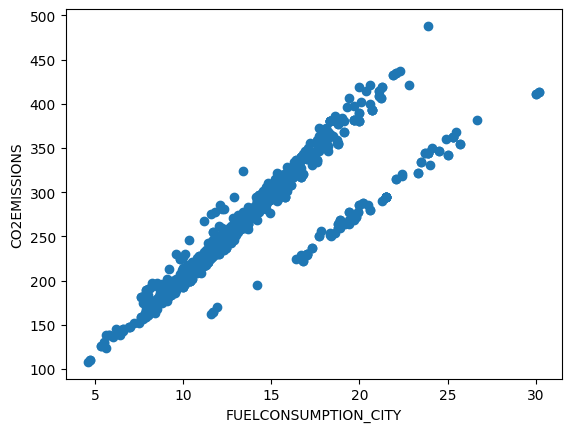

In [ ]:
plt.scatter(x = 'FUELCONSUMPTION_CITY', y = 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

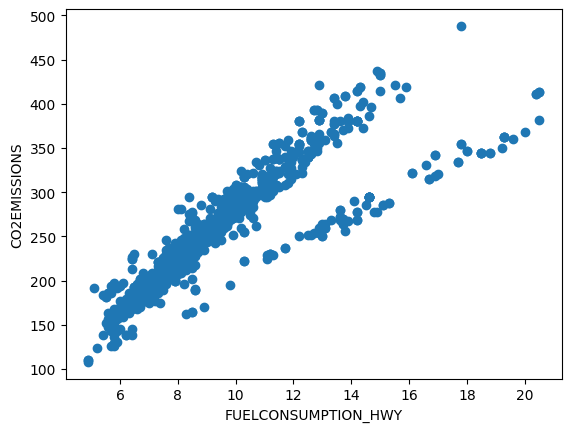

In [ ]:
plt.scatter(x = 'FUELCONSUMPTION_HWY', y = 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

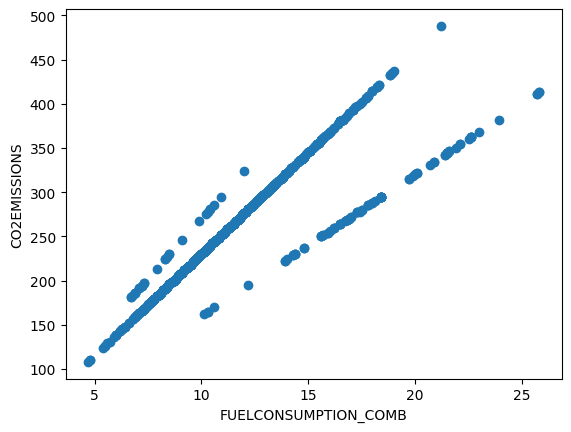

In [ ]:
plt.scatter(x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()



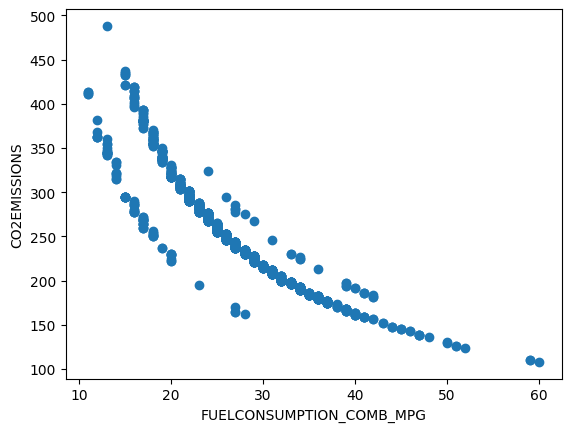

In [ ]:
#NON LINEAR REGRESSION - NO STRAIGHT LINE
plt.scatter(x = 'FUELCONSUMPTION_COMB_MPG', y = 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>

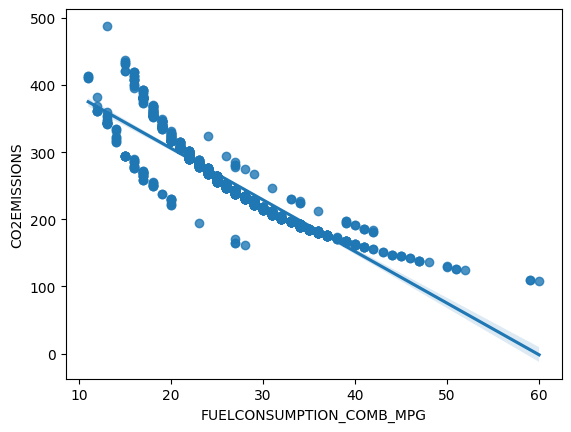

In [ ]:
sns.regplot(x = 'FUELCONSUMPTION_COMB_MPG', y = 'CO2EMISSIONS', data = df)

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [ ]:
import numpy as np

#msk variable is storing 80% and lower of the total length of dataset choosing randomly for training

msk = np.random.rand(len(df)) <= 0.8

train = df[msk]
test = df[~msk] #the rest 20% will be stored in test variable (randomly choosed)



###Train and Test Dataset Distribution

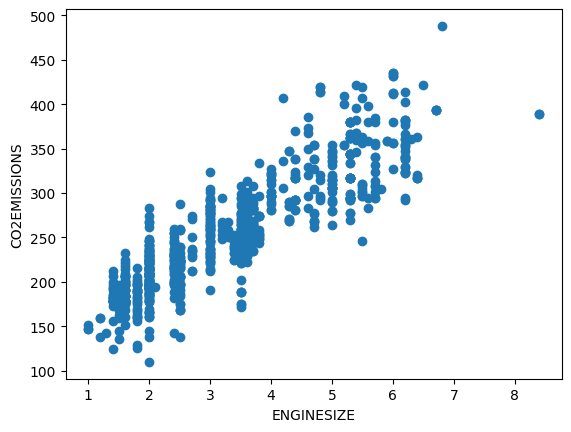

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

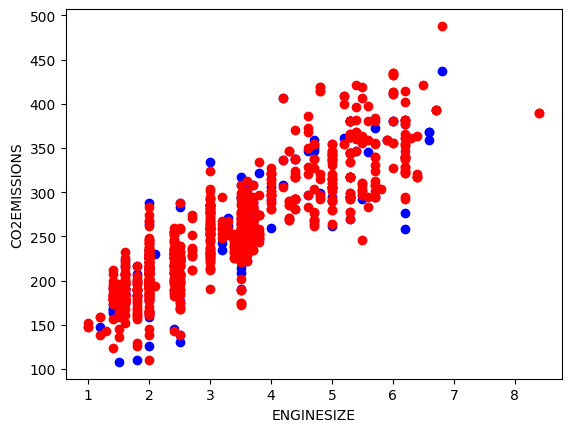

In [ ]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'blue')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'red')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

###7 - Modeling

In [ ]:
#Modeling for ENGINESIZE with CO2EMISSIONS

from sklearn import linear_model

regr = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr.fit(train_x, train_y)

LinearRegression()

In [ ]:
#once run, means the regression model has find out best fit line

print('The value of the slope is:', regr.coef_)
print('The value of the intercept is:', regr.intercept_)

#the output will be different on other devices/ if we run again because the value is calculated based on random data

The value of the slope is: [[39.30872166]]
The value of the intercept is: [125.27431031]


Text(0, 0.5, 'Emission')

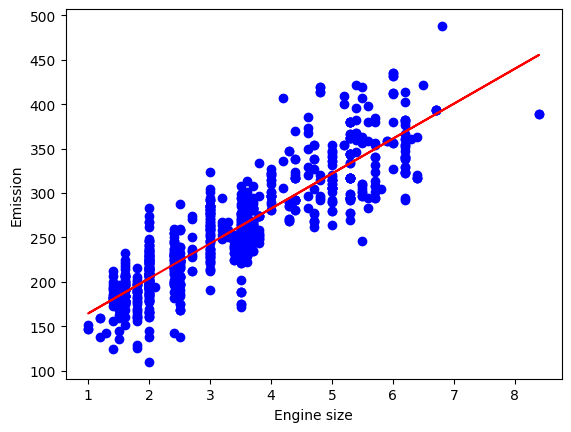

In [ ]:
#best fitted line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
x = 2.4 #based on book (predicting the value in y axis = CO2EMISSIONS)
y = regr.coef_ * x + regr.intercept_

y

array([[219.6152423]])

In [ ]:
x = int(df['ENGINESIZE'].sample())
y = regr.coef_ * x + regr.intercept_

y

<ipython-input-22-71525141ffc2>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample())


array([[203.89175364]])

###8 - Evaluation

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #actual test

test_y_ = regr.predict(test_x) #prediction test

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2)) #comparing the r2 value for actual test model and the prediction test model  - times 100 and rounding the value to 2 decimal place to get better understanding
print('The MSE is:', np.mean((test_y - test_y_)**2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 74.91
The MSE is: 982.5360131873091
The RMSE is: 31.345430499313757


###Checking other correlated features

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#Modeling for FUELCONSUMPTION_COMB_MPG with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr1 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr1.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr1.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 82.31
The MSE is: 77264.03
The MAE is: 1835.31
The RMSE is: 27.796408182659178


In [ ]:
#Modeling for CYLINDERS with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr2 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr2.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr2.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 68.54
The MSE is: 137454.22
The MAE is: 2910.34
The RMSE is: 37.07481906765008


In [ ]:
#Modeling for FUELCONSUMPTION_CITY with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr3 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr3.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr3.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 82.98
The MSE is: 74347.23
The MAE is: 1992.22
The RMSE is: 27.266687650688205


In [ ]:
#Modeling for FUELCONSUMPTION_HWY with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr4 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr4.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr4.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 78.03
The MSE is: 95962.57
The MAE is: 2412.91
The RMSE is: 30.977826364116854


In [ ]:
#Modeling for FUELCONSUMPTION_COMB with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr5 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr5.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr5.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 82.75
The MSE is: 75353.11
The MAE is: 2060.95
The RMSE is: 27.450520737472026


In [ ]:
#Modeling for CO2EMISSIONS with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr6 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['CO2EMISSIONS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr6.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['CO2EMISSIONS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr6.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 100.0
The MSE is: 0.0
The MAE is: 0.0
The RMSE is: 1.4867348139688645e-14


##**Multiple Linear Regression**

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#Modeling for FUELCONSUMPTION_HWY & FUELCONSUMPTION_COMB with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr7 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr7.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr7.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 82.5
The MSE is: 76443.11
The MAE is: 2020.6
The RMSE is: 27.648347374925372


In [ ]:
#Modeling for ALL NUMERIC FEATURES with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr8 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr8.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr8.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 89.64
The MSE is: 45262.7
The MAE is: 1463.43
The RMSE is: 21.275033086949616
